In [1]:
# Power and sample size calculation
# For Microbiome studies --> Using Dummy Data
# Type1 and Type2 Calculations
# Including Effects of ICC (Considering Longitudinal Samples) and remove the effects of Covariates (i.e.; diet, antibiotics, illness)

# By: Ashok K. Sharma
# Date: 10-16-2024

In [2]:
# Following this publication for Power Calculation
# https://www.nature.com/articles/s41385-022-00548-1

# Type1: Comparison of two means in normally distributed continuous data

#Standard formulae
#Comparison of two means in normally distributed continuous data
#If the two groups contain the same number of samples, the required sample size per group can be calculated as14:
#n 1⁄4 2
#Δ2
#2ðZ1α þZ1βÞ2
#; Equation A
#where:
#• n = the required sample size in each group
#μμ
#• Δ = 1 2 ; is the effect size, where μ and μ are two populations means and σ is the common
#σ12 variance, σ1 = σ2 = σ
#• Z1  α ; Z1  β are the upper tail normal quantiles associated with the desired type I and type II errors, α and β, respectively.
#If the two groups are not equally sized, then let parameter r denote the ratio of the number of individuals in the larger group divided by the number of individuals in the smaller group. The sample size of the smaller group for a two-sided Z test is given as follows:
#n2 1⁄4rþ1 2 rΔ
#;
#ðZ1α þZ1βÞ2
#2
#and the sample size for the larger group,
#n1 1⁄4 r n2; Equation B

# Type2: Example is Also Provided at Last

In [3]:
# Dummy DataSet Generation
import numpy as np
import pandas as pd
def simulate_cd_pilot_data_high_icc(num_subjects=50, num_timepoints=11):
    # Generate repeated measures for each subject (preconception + 10 longitudinal timepoints)
    subject_ids = np.repeat(np.arange(num_subjects), num_timepoints)
    time = np.tile(np.arange(num_timepoints), num_subjects)

    # Simulate Shannon diversity with increased random subject effect to increase ICC
    shannon_values = np.random.normal(3.0, 0.5, size=num_subjects * num_timepoints)

    # Increase random effects for each subject (higher variance to increase ICC)
    random_effects = np.random.normal(0, 0.5, size=num_subjects)  # Larger random effect for each subject
    shannon_values += np.repeat(random_effects, num_timepoints)

    # Time effect variability (you can reduce this if needed to increase ICC)
    time_effect = np.random.normal(0, 0.2, size=num_timepoints * num_subjects)  # Moderate time effect variation
    shannon_values += time_effect

    # Simulate covariates
    antibiotic_use = np.random.choice([0, 1], size=num_subjects * num_timepoints)  # Binary covariate
    illness = np.random.choice([0, 1], size=num_subjects * num_timepoints)  # Binary covariate
    diet = np.random.choice([0, 1], size=num_subjects * num_timepoints)  # Binary covariate

    # Simulate group labels (CD_flare, CD_asymptomatic)
    group_labels = np.random.choice(['CD_flare', 'CD_asymptomatic'], size=num_subjects * num_timepoints)

    # Moderate group effect size (difference between groups ~ 0.1 to 0.3)
    group_effect = np.where(group_labels == 'CD_flare', 0.1, -0.1)  # Smaller group difference for moderate effect size
    shannon_values += group_effect

    # Reduce within-group noise to increase ICC
    shannon_values += np.random.normal(0, 0.2, size=num_subjects * num_timepoints)  # Reduced noise within groups

    # Create DataFrame
    df = pd.DataFrame({
        'Subject_ID': subject_ids,
        'Time': time,
        'Shannon': shannon_values,
        'Antibiotic_Use': antibiotic_use,
        'Illness': illness,
        'Diet': diet,
        'Group': group_labels
    })
    
    return df

# Simulate the dataset with increased ICC and reduced effect size
df_cd_pilot_high_icc = simulate_cd_pilot_data_high_icc(num_subjects=50, num_timepoints=11)
print(df_cd_pilot_high_icc.head())
#df_cd_pilot_high_icc.to_csv("data/df_cd_pilot_highICC.csv") # Don't save it again and again

   Subject_ID  Time   Shannon  Antibiotic_Use  Illness  Diet            Group
0           0     0  2.168650               0        0     1  CD_asymptomatic
1           0     1  1.193524               1        1     1  CD_asymptomatic
2           0     2  3.589764               1        0     0  CD_asymptomatic
3           0     3  2.424038               1        0     1         CD_flare
4           0     4  2.212611               0        0     0  CD_asymptomatic


In [4]:
# Let's check the data
data = pd.read_csv('data/df_cd_pilot_highICC.csv') # Equal number of samples in Both Groups
data['Subject_ID'].value_counts() # Number of Subjects
data['Time'].value_counts() # Number of Timepoints
data['Group'].value_counts() # Number of Classes

Group
CD_flare           278
CD_asymptomatic    272
Name: count, dtype: int64

Effect Size (absolute): 0.2534700864733883
equal group sizes detected (Case: 278, Control: 272). Using Equation B.
Z_alpha: 1.959963984540054, Z_beta: 0.0
Effect Size: 0.2534700864733883
Standard Deviation: 0.7398675544206396
Ratio: 1.0220588235294117
Numerator: 4.252045787898732
Denominator: 0.06566429984131576
Z_alpha: 1.959963984540054, Z_beta: 0.12566134685507416
Effect Size: 0.2534700864733883
Standard Deviation: 0.7398675544206396
Ratio: 1.0220588235294117
Numerator: 4.81475659290947
Denominator: 0.06566429984131576
Z_alpha: 1.959963984540054, Z_beta: 0.25334710313580006
Effect Size: 0.2534700864733883
Standard Deviation: 0.7398675544206396
Ratio: 1.0220588235294117
Numerator: 5.422339049695972
Denominator: 0.06566429984131576
Z_alpha: 1.959963984540054, Z_beta: 0.385320466407568
Effect Size: 0.2534700864733883
Standard Deviation: 0.7398675544206396
Ratio: 1.0220588235294117
Numerator: 6.088254507532283
Denominator: 0.06566429984131576
Z_alpha: 1.959963984540054, Z_beta: 0.524400

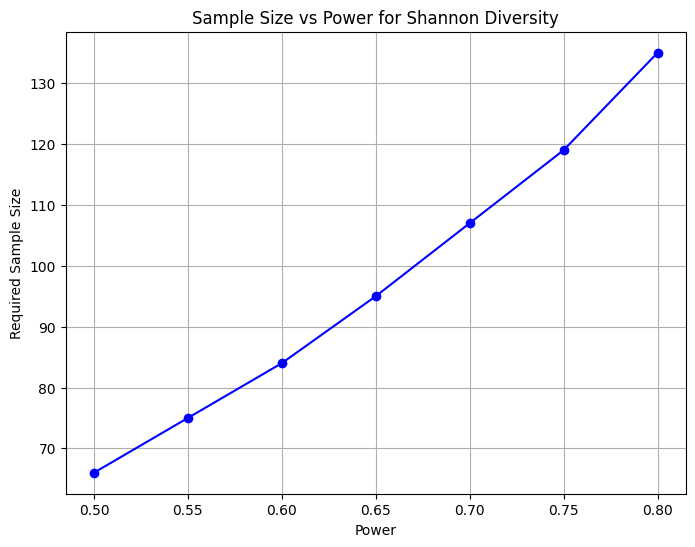

Power: 0.50, Sample Size: 66
Power: 0.55, Sample Size: 75
Power: 0.60, Sample Size: 84
Power: 0.65, Sample Size: 95
Power: 0.70, Sample Size: 107
Power: 0.75, Sample Size: 119
Power: 0.80, Sample Size: 135


In [5]:
#Comparison of two means in normally distributed continuous data (Extremely Important)
# Power calculation on Diversity Data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm

# Load the microbiome diversity data from CSV
data = pd.read_csv('data/df_cd_pilot_highICC.csv') # Equal number of samples in Both Groups
#data = pd.read_csv('Richness_total.csv') # Unequal number of samples in both Groups

# Select the column for diversity (either 'Observed' or 'Shannon')
column_name = 'Shannon'  # Change to 'Observed' if needed
diversity_data = data[column_name]

# Split data into cases and controls
case_data = diversity_data[data['Group'] == 'CD_flare']
control_data = diversity_data[data['Group'] == 'CD_asymptomatic']

############################################## Functions ############################
# Function to calculate effect size
def calculate_effect_size(case_data, control_data):
    mean_diff = np.mean(case_data) - np.mean(control_data)
    pooled_std_dev = np.sqrt((np.var(case_data) + np.var(control_data)) / 2)
    if pooled_std_dev == 0:
        return np.nan  # Avoid division by zero
    return mean_diff / pooled_std_dev

# Function to calculate sample size based on Equation A (equal group sizes)
def sample_size_equal_groups(effect_size, std_dev, alpha=0.05, power=0.8):
    if effect_size == 0 or np.isnan(effect_size):
        return np.nan  # Avoid division by zero if effect size is invalid
    
    Z_alpha = norm.ppf(1 - alpha / 2)  # Two-sided test
    Z_beta = norm.ppf(power)
    # Print Z-scores to debug overflow issues
    print(f"Z_alpha: {Z_alpha}, Z_beta: {Z_beta}")

    # Check if Z_beta is too large, which might cause overflow
    if np.isnan(Z_beta) or Z_beta == np.inf:
        print("Z_beta is too large or resulted in NaN, skipping this power level.")
        return np.nan
        
    numerator = 2 * (Z_alpha + Z_beta) ** 2 * std_dev ** 2
    denominator = effect_size ** 2

    # Debugging print statements (after variables are defined)
    print(f"Effect Size: {effect_size}")
    print(f"Standard Deviation: {std_dev}")
    #print(f"Ratio: {ratio}") # There is no need to ratio in this formula because its a Equal Sample Size
    print(f"Numerator: {numerator}")
    print(f"Denominator: {denominator}")

    # Check if denominator is valid
    if denominator == 0 or np.isnan(denominator):
        print("Denominator is invalid (division by zero or NaN). Check the input values.")
        return np.nan  # Return NaN if denominator is invalid
    
    return int(np.ceil(numerator / denominator))

# Function to calculate sample size based on Equation B (unequal group sizes)
def sample_size_unequal_groups(effect_size, std_dev, ratio, alpha=0.05, power=0.8):
    if effect_size == 0 or np.isnan(effect_size):
        return np.nan  # Avoid division by zero if effect size is invalid
    
    Z_alpha = norm.ppf(1 - alpha / 2)  # Two-sided test
    Z_beta = norm.ppf(power)
    
    # Print Z-scores to debug overflow issues
    print(f"Z_alpha: {Z_alpha}, Z_beta: {Z_beta}")
    
    # Check if Z_beta is too large, which might cause overflow
    if np.isnan(Z_beta) or Z_beta == np.inf:
        print("Z_beta is too large or resulted in NaN, skipping this power level.")
        return np.nan

    numerator = (ratio + 1) * (Z_alpha + Z_beta) ** 2 * std_dev ** 2
    denominator = ratio * effect_size ** 2
    
    # Debugging print statements (after variables are defined)
    print(f"Effect Size: {effect_size}")
    print(f"Standard Deviation: {std_dev}")
    print(f"Ratio: {ratio}")
    print(f"Numerator: {numerator}")
    print(f"Denominator: {denominator}")
    
    # Check if denominator is valid
    if denominator == 0 or np.isnan(denominator):
        print("Denominator is invalid (division by zero or NaN). Check the input values.")
        return np.nan  # Return NaN if denominator is invalid
    
    n2 = int(np.ceil(numerator / denominator))  # Sample size of the smaller group
    n1 = int(ratio * n2)  # Sample size of the larger group
    return n1, n2
####################################

# Calculate effect size using diversity column
effect_size = calculate_effect_size(case_data, control_data)

# Use absolute value of effect size to avoid negative values
effect_size = abs(effect_size)

# Check if the effect size is valid
if np.isnan(effect_size):
    print("Invalid effect size (NaN). Check your data.")
else:
    print(f"Effect Size (absolute): {effect_size}")

# Assuming standard deviation is pooled between cases and controls
std_dev = np.sqrt((np.var(case_data) + np.var(control_data)) / 2)

# Check if the groups are equal or unequal in size
n_case = len(case_data)
n_control = len(control_data)

if n_case == n_control:
    print("Equal group sizes detected. Using Equation A.")
    sample_size_func = sample_size_equal_groups
else:
    print(f"equal group sizes detected (Case: {n_case}, Control: {n_control}). Using Equation B.")
    ratio = max(n_case, n_control) / min(n_case, n_control)
    sample_size_func = lambda es, sd, alpha, power: sample_size_unequal_groups(es, sd, ratio, alpha, power)

# Define power levels and significance level
power_levels = np.arange(0.5, 0.8, 0.05)  # Power levels from 0.7 to 0.95
alpha = 0.05

# Calculate sample sizes for different power levels
sample_sizes = []
for power in power_levels:
    sample_size = sample_size_func(effect_size, std_dev, alpha, power)
    if isinstance(sample_size, tuple):
        sample_sizes.append(max(sample_size))  # Use the larger sample size when unequal
    elif np.isnan(sample_size):
        print(f"Sample size calculation failed for power: {power}")
        sample_sizes.append(np.nan)
    else:
        sample_sizes.append(sample_size)

# Plotting power vs. sample size
plt.figure(figsize=(8, 6))
plt.plot(power_levels, sample_sizes, marker='o', linestyle='-', color='b')
plt.title(f'Sample Size vs Power for {column_name} Diversity')
plt.xlabel('Power')
plt.ylabel('Required Sample Size')
plt.grid(True)
plt.savefig('Figures/Type1_analysis.png', dpi=300, bbox_inches='tight')  # Change the file name and format as needed
plt.show()

# Print the results
for power, sample_size in zip(power_levels, sample_sizes):
    print(f"Power: {power:.2f}, Sample Size: {sample_size}")

Effect Size (absolute): 0.2534700864733883


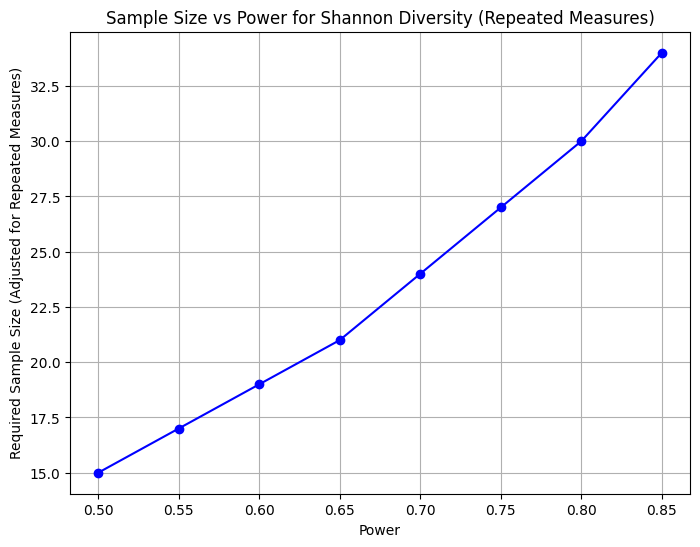

Power: 0.50, Adjusted Sample Size: 15
Power: 0.55, Adjusted Sample Size: 17
Power: 0.60, Adjusted Sample Size: 19
Power: 0.65, Adjusted Sample Size: 21
Power: 0.70, Adjusted Sample Size: 24
Power: 0.75, Adjusted Sample Size: 27
Power: 0.80, Adjusted Sample Size: 30
Power: 0.85, Adjusted Sample Size: 34


In [6]:
# Repeated Measures Include ICC
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm
from statsmodels.regression.mixed_linear_model import MixedLM

# Load the microbiome diversity data from CSV
data = pd.read_csv('data/df_cd_pilot_highICC.csv')  # Equal number of samples in both groups
# data = pd.read_csv('Richness_total.csv')  # Uncomment for unequal number of samples in both groups

# Select the column for diversity (either 'Observed' or 'Shannon')
column_name = 'Shannon'  # Change to 'Observed' if needed
diversity_data = data[column_name]

# Split data into cases and controls
case_data = diversity_data[data['Group'] == 'CD_flare']
control_data = diversity_data[data['Group'] == 'CD_asymptomatic']

# Split the time column for repeated measures
time = data['Time']

############################################## Functions ############################
# Function to calculate effect size
def calculate_effect_size(case_data, control_data):
    mean_diff = np.mean(case_data) - np.mean(control_data)
    pooled_std_dev = np.sqrt((np.var(case_data) + np.var(control_data)) / 2)
    if pooled_std_dev == 0:
        return np.nan  # Avoid division by zero
    return mean_diff / pooled_std_dev

# Function to calculate ICC (Intraclass Correlation Coefficient)
def calculate_icc(data, column_name, subject_column):
    model = MixedLM.from_formula(f"{column_name} ~ 1", groups=subject_column, data=data)
    fit = model.fit()
    random_effect_variance = fit.cov_re.iloc[0, 0]  # Variance of random effects
    residual_variance = fit.scale  # Variance of residuals
    total_variance = random_effect_variance + residual_variance
    icc_value = random_effect_variance / total_variance
    return icc_value

# Adjust for ICC in sample size calculation
def adjust_for_repeated_measures(sample_size, icc, num_timepoints):
    # Formula to adjust for ICC and repeated measures
    return sample_size / (1 + (num_timepoints - 1) * icc)

# Function to calculate sample size with ICC for equal group sizes
def sample_size_equal_groups_with_icc(effect_size, std_dev, icc, num_timepoints, alpha=0.05, power=0.8):
    if effect_size == 0 or np.isnan(effect_size):
        return np.nan  # Avoid division by zero if effect size is invalid
    
    Z_alpha = norm.ppf(1 - alpha / 2)  # Two-sided test
    Z_beta = norm.ppf(power)

    numerator = 2 * (Z_alpha + Z_beta) ** 2 * std_dev ** 2
    denominator = effect_size ** 2

    # Calculate initial sample size without adjustment
    sample_size = int(np.ceil(numerator / denominator))
    
    # Adjust sample size for repeated measures using ICC
    adjusted_sample_size = adjust_for_repeated_measures(sample_size, icc, num_timepoints)
    
    return int(np.ceil(adjusted_sample_size))

####################################

# Calculate effect size using diversity column
effect_size = calculate_effect_size(case_data, control_data)

# Use absolute value of effect size to avoid negative values
effect_size = abs(effect_size)

# Check if the effect size is valid
if np.isnan(effect_size):
    print("Invalid effect size (NaN). Check your data.")
else:
    print(f"Effect Size (absolute): {effect_size}")

# Assuming standard deviation is pooled between cases and controls
std_dev = np.sqrt((np.var(case_data) + np.var(control_data)) / 2)

# Define number of time points for repeated measures and ICC
num_timepoints = len(np.unique(time))

# Compute ICC based on the data
icc = calculate_icc(data, column_name, subject_column='Subject_ID')

#icc = 0.37  # Set ICC based on your study assumption

# Define power levels and significance level
power_levels = np.arange(0.5, 0.9, 0.05)  # Power levels from 0.5 to 0.9
alpha = 0.05

# Calculate sample sizes for different power levels, adjusting for repeated measures
sample_sizes = []
for power in power_levels:
    sample_size = sample_size_equal_groups_with_icc(effect_size, std_dev, icc, num_timepoints, alpha, power)
    if np.isnan(sample_size):
        print(f"Sample size calculation failed for power: {power}")
        sample_sizes.append(np.nan)
    else:
        sample_sizes.append(sample_size)

# Plotting power vs. sample size
plt.figure(figsize=(8, 6))
plt.plot(power_levels, sample_sizes, marker='o', linestyle='-', color='b')
plt.title(f'Sample Size vs Power for {column_name} Diversity (Repeated Measures)')
plt.xlabel('Power')
plt.ylabel('Required Sample Size (Adjusted for Repeated Measures)')
plt.grid(True)
plt.savefig('Figures/Type1_analysisICC.png', dpi=300, bbox_inches='tight')  # Change the file name and format as needed
plt.show()

# Print the results
for power, sample_size in zip(power_levels, sample_sizes):
    print(f"Power: {power:.2f}, Adjusted Sample Size: {sample_size}")

Effect Size (absolute): 0.2542031030979452
Calculated ICC: 0.36


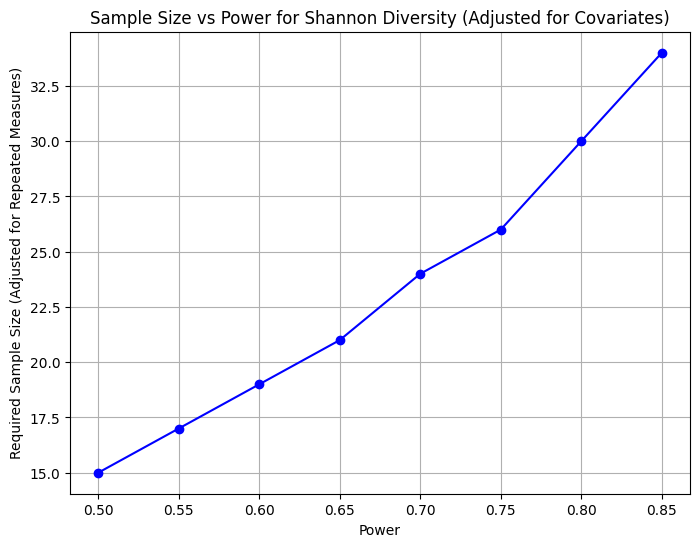

Power: 0.50, Adjusted Sample Size: 15
Power: 0.55, Adjusted Sample Size: 17
Power: 0.60, Adjusted Sample Size: 19
Power: 0.65, Adjusted Sample Size: 21
Power: 0.70, Adjusted Sample Size: 24
Power: 0.75, Adjusted Sample Size: 26
Power: 0.80, Adjusted Sample Size: 30
Power: 0.85, Adjusted Sample Size: 34


In [7]:
# Repeated Measures Include ICC and Remove the effects of Covariates
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm
from statsmodels.formula.api import ols
from statsmodels.regression.mixed_linear_model import MixedLM

# Load the microbiome diversity data from CSV
data = pd.read_csv('data/df_cd_pilot_highICC.csv')  # Equal number of samples in both groups

# Select the column for diversity (either 'Observed' or 'Shannon')
column_name = 'Shannon'  # Change to 'Observed' if needed
diversity_data = data[column_name]

# Split the time column for repeated measures
time = data['Time']

# Fit a linear regression model to remove the effects of covariates
formula = f"{column_name} ~ Antibiotic_Use + Illness + Diet"
model = ols(formula, data=data).fit()

# Get the residuals from the model (diversity values adjusted for covariates)
data['Residuals'] = model.resid

# Use the residuals for power analysis
case_data = data.loc[data['Group'] == 'CD_flare', 'Residuals']
control_data = data.loc[data['Group'] == 'CD_asymptomatic', 'Residuals']

############################################## Functions ############################
# Function to calculate effect size using residuals
def calculate_effect_size(case_data, control_data):
    mean_diff = np.mean(case_data) - np.mean(control_data)
    pooled_std_dev = np.sqrt((np.var(case_data) + np.var(control_data)) / 2)
    if pooled_std_dev == 0:
        return np.nan  # Avoid division by zero
    return mean_diff / pooled_std_dev

# Function to calculate ICC (Intraclass Correlation Coefficient)
def calculate_icc(data, column_name, subject_column):
    model = MixedLM.from_formula(f"{column_name} ~ 1", groups=subject_column, data=data)
    fit = model.fit()
    random_effect_variance = fit.cov_re.iloc[0, 0]  # Variance of random effects
    residual_variance = fit.scale  # Variance of residuals
    total_variance = random_effect_variance + residual_variance
    icc_value = random_effect_variance / total_variance
    return icc_value

# Adjust for ICC in sample size calculation
def adjust_for_repeated_measures(sample_size, icc, num_timepoints):
    # Formula to adjust for ICC and repeated measures
    return sample_size / (1 + (num_timepoints - 1) * icc)

# Function to calculate sample size with ICC for equal group sizes
def sample_size_equal_groups_with_icc(effect_size, std_dev, icc, num_timepoints, alpha=0.05, power=0.8):
    if effect_size == 0 or np.isnan(effect_size):
        return np.nan  # Avoid division by zero if effect size is invalid
    
    Z_alpha = norm.ppf(1 - alpha / 2)  # Two-sided test
    Z_beta = norm.ppf(power)

    numerator = 2 * (Z_alpha + Z_beta) ** 2 * std_dev ** 2
    denominator = effect_size ** 2

    # Calculate initial sample size without adjustment
    sample_size = int(np.ceil(numerator / denominator))
    
    # Adjust sample size for repeated measures using ICC
    adjusted_sample_size = adjust_for_repeated_measures(sample_size, icc, num_timepoints)
    
    return int(np.ceil(adjusted_sample_size))

####################################

# Calculate effect size using residuals after adjusting for covariates
effect_size = calculate_effect_size(case_data, control_data)

# Use absolute value of effect size to avoid negative values
effect_size = abs(effect_size)

# Check if the effect size is valid
if np.isnan(effect_size):
    print("Invalid effect size (NaN). Check your data.")
else:
    print(f"Effect Size (absolute): {effect_size}")

# Assuming standard deviation is pooled between cases and controls
std_dev = np.sqrt((np.var(case_data) + np.var(control_data)) / 2)

# Define number of time points for repeated measures and ICC
num_timepoints = len(np.unique(time))

# Compute ICC based on the data
icc = calculate_icc(data, column_name, subject_column='Subject_ID')
print(f"Calculated ICC: {icc:.2f}")
#icc = 0.37  # Set ICC based on your study assumption

# Define power levels and significance level
power_levels = np.arange(0.5, 0.9, 0.05)  # Power levels from 0.5 to 0.9
alpha = 0.05

# Calculate sample sizes for different power levels, adjusting for repeated measures
sample_sizes = []
for power in power_levels:
    sample_size = sample_size_equal_groups_with_icc(effect_size, std_dev, icc, num_timepoints, alpha, power)
    if np.isnan(sample_size):
        print(f"Sample size calculation failed for power: {power}")
        sample_sizes.append(np.nan)
    else:
        sample_sizes.append(sample_size)

# Plotting power vs. sample size
plt.figure(figsize=(8, 6))
plt.plot(power_levels, sample_sizes, marker='o', linestyle='-', color='b')
plt.title(f'Sample Size vs Power for {column_name} Diversity (Adjusted for Covariates)')
plt.xlabel('Power')
plt.ylabel('Required Sample Size (Adjusted for Repeated Measures)')
plt.grid(True)
plt.savefig('Figures/Type1_analysisICC_Adjcovariates.png', dpi=300, bbox_inches='tight')  # Change the file name and format as needed
plt.show()

# Print the results
for power, sample_size in zip(power_levels, sample_sizes):
    print(f"Power: {power:.2f}, Adjusted Sample Size: {sample_size}")

effect_size: 0.25
Effect Size (absolute): 0.2542031030979452
Calculated ICC: 0.36
Calculated Power for 10 individuals/group with 11 timepoints: 0.64


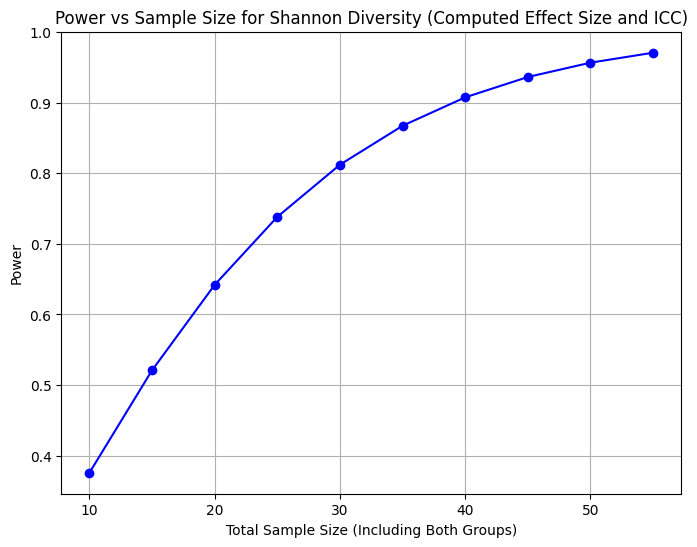

Sample Size: 10, Power: 0.38
Sample Size: 15, Power: 0.52
Sample Size: 20, Power: 0.64
Sample Size: 25, Power: 0.74
Sample Size: 30, Power: 0.81
Sample Size: 35, Power: 0.87
Sample Size: 40, Power: 0.91
Sample Size: 45, Power: 0.94
Sample Size: 50, Power: 0.96
Sample Size: 55, Power: 0.97


In [8]:
## Compute Power with Sugggested Sample set

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm
from statsmodels.formula.api import ols
from statsmodels.regression.mixed_linear_model import MixedLM

# Load the microbiome diversity data from CSV
data = pd.read_csv('data/df_cd_pilot_highICC.csv')  # Equal number of samples in both groups

# Select the column for diversity (either 'Observed' or 'Shannon')
column_name = 'Shannon'  # Change to 'Observed' if needed
diversity_data = data[column_name]

# Split the time column for repeated measures
time = data['Time']

# Fit a linear regression model to remove the effects of covariates
formula = f"{column_name} ~ Antibiotic_Use + Illness + Diet"
model = ols(formula, data=data).fit()

# Get the residuals from the model (diversity values adjusted for covariates)
data['Residuals'] = model.resid

# Use the residuals for power analysis
case_data = data.loc[data['Group'] == 'CD_flare', 'Residuals']
control_data = data.loc[data['Group'] == 'CD_asymptomatic', 'Residuals']

############################################## Functions ############################
# Function to calculate effect size using residuals
def calculate_effect_size(case_data, control_data):
    mean_diff = np.mean(case_data) - np.mean(control_data)
    pooled_std_dev = np.sqrt((np.var(case_data) + np.var(control_data)) / 2)
    if pooled_std_dev == 0:
        return np.nan  # Avoid division by zero
    return mean_diff / pooled_std_dev

# Function to calculate ICC (Intraclass Correlation Coefficient)
def calculate_icc(data, column_name, subject_column):
    model = MixedLM.from_formula(f"{column_name} ~ 1", groups=subject_column, data=data)
    fit = model.fit()
    random_effect_variance = fit.cov_re.iloc[0, 0]  # Variance of random effects
    residual_variance = fit.scale  # Variance of residuals
    total_variance = random_effect_variance + residual_variance
    icc_value = random_effect_variance / total_variance
    return icc_value

# Adjust for ICC in sample size calculation
def adjust_for_repeated_measures(sample_size, icc, num_timepoints):
    # Formula to adjust for ICC and repeated measures
    return sample_size / (1 + (num_timepoints - 1) * icc)

# Function to calculate power for equal group sizes considering repeated measures
def power_equal_groups_with_icc(sample_size, effect_size, std_dev, icc, num_timepoints, alpha=0.05):
    if effect_size == 0 or np.isnan(effect_size):
        return np.nan  # Avoid division by zero if effect size is invalid
    
    # Adjust sample size for repeated measures using ICC
    adjusted_sample_size = sample_size * (1 + (num_timepoints - 1) * icc)

    # Calculate the Z_alpha for the significance level
    Z_alpha = norm.ppf(1 - alpha / 2)  # Two-sided test

    # Calculate the non-centrality parameter for power estimation
    numerator = effect_size * np.sqrt(adjusted_sample_size)
    denominator = np.sqrt(2 * std_dev ** 2)
    non_central_param = numerator / denominator

    # Estimate power using the Z_alpha and non-central parameter
    Z_beta = non_central_param - Z_alpha
    power = norm.cdf(Z_beta)
    
    return power

##############################################

# Given parameters
num_individuals_per_group = 10  # Number of individuals per group
num_timepoints = 11  # Number of timepoints (longitudinal samples)
total_sample_size = num_individuals_per_group * 2  # Total number of samples for both groups combined

# Calculate effect size using residuals after adjusting for covariates
effect_size = calculate_effect_size(case_data, control_data)
# Use absolute value of effect size to avoid negative values
effect_size = abs(effect_size)
print(f"effect_size: {effect_size:.2f}")

# Check if the effect size is valid
if np.isnan(effect_size):
    print("Invalid effect size (NaN). Check your data.")
else:
    print(f"Effect Size (absolute): {effect_size}")

# Assuming standard deviation is pooled between cases and controls
std_dev = np.sqrt((np.var(case_data) + np.var(control_data)) / 2)

# Define number of time points for repeated measures and ICC
num_timepoints = len(np.unique(time))

# Compute ICC based on the data
icc = calculate_icc(data, column_name, subject_column='Subject_ID')
print(f"Calculated ICC: {icc:.2f}")

# Use previously calculated effect size and ICC
# Assuming these variables are already defined from your earlier calculation:
# effect_size, std_dev, icc

# Calculate power for the specified sample size
calculated_power = power_equal_groups_with_icc(total_sample_size, effect_size, std_dev, icc, num_timepoints, alpha=0.05)

# Print the result
print(f"Calculated Power for 10 individuals/group with 11 timepoints: {calculated_power:.2f}")

# Optional: Adjust the power estimation range for different sample sizes to see the trend
sample_sizes_range = np.arange(10, 60, 5)  # Example range of total sample sizes
powers = [power_equal_groups_with_icc(n, effect_size, std_dev, icc, num_timepoints, alpha=0.05) for n in sample_sizes_range]

# Plotting power vs. sample size
plt.figure(figsize=(8, 6))
plt.plot(sample_sizes_range, powers, marker='o', linestyle='-', color='b')
plt.title(f'Power vs Sample Size for {column_name} Diversity (Computed Effect Size and ICC)')
plt.xlabel('Total Sample Size (Including Both Groups)')
plt.ylabel('Power')
plt.grid(True)
plt.savefig('Figures/PowerAchieved_type1.png', dpi=300, bbox_inches='tight')  # Change the file name and format as needed
plt.show()

# Print results for each sample size
for n, pwr in zip(sample_sizes_range, powers):
    print(f"Sample Size: {n}, Power: {pwr:.2f}")

Effect Size (absolute): 0.2534700864733883
Calculated ICC: 0.36
Calculated ratio: 1.02


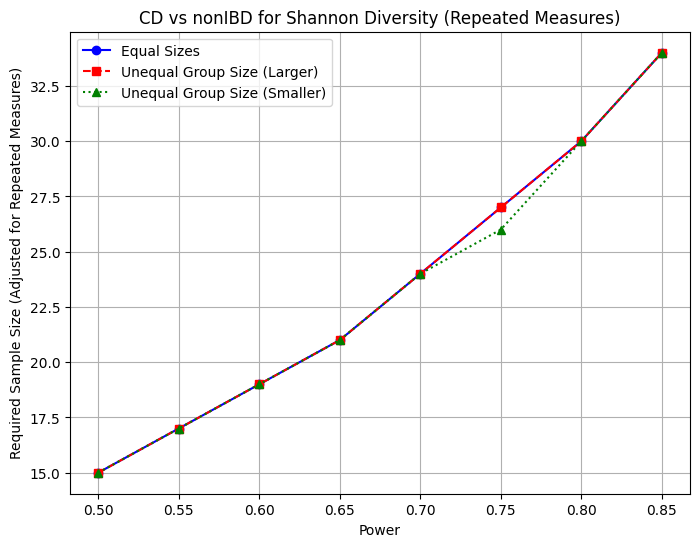

Power: 0.50, Adjusted Sample Size (Equal): 15, (Unequal): n1: 15, n2: 15
Power: 0.55, Adjusted Sample Size (Equal): 17, (Unequal): n1: 17, n2: 17
Power: 0.60, Adjusted Sample Size (Equal): 19, (Unequal): n1: 19, n2: 19
Power: 0.65, Adjusted Sample Size (Equal): 21, (Unequal): n1: 21, n2: 21
Power: 0.70, Adjusted Sample Size (Equal): 24, (Unequal): n1: 24, n2: 24
Power: 0.75, Adjusted Sample Size (Equal): 27, (Unequal): n1: 27, n2: 26
Power: 0.80, Adjusted Sample Size (Equal): 30, (Unequal): n1: 30, n2: 30
Power: 0.85, Adjusted Sample Size (Equal): 34, (Unequal): n1: 34, n2: 34


In [9]:
#Type1: Comparison of two means in normally distributed continuous data
# Sample Calculation for Both groups

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm
import statsmodels.api as sm
from statsmodels.regression.mixed_linear_model import MixedLM

# Load the microbiome diversity data from CSV
data = pd.read_csv('data/df_cd_pilot_highICC.csv') # Equal number of samples in Both Groups

# Select the column for diversity (either 'Observed' or 'Shannon')
column_name = 'Shannon'  # Change to 'Observed' if needed
diversity_data = data[column_name]

# Split data into cases and controls
case_data = diversity_data[data['Group'] == 'CD_flare']
control_data = diversity_data[data['Group'] == 'CD_asymptomatic']

# Split the time column for repeated measures
time = data['Time']

############################################## Functions ############################
# Function to calculate effect size
def calculate_effect_size(case_data, control_data):
    mean_diff = np.mean(case_data) - np.mean(control_data)
    pooled_std_dev = np.sqrt((np.var(case_data) + np.var(control_data)) / 2)
    if pooled_std_dev == 0:
        return np.nan  # Avoid division by zero
    return mean_diff / pooled_std_dev

# Function to calculate ICC (Intraclass Correlation Coefficient)
def calculate_icc(data, column_name, subject_column):
    model = MixedLM.from_formula(f"{column_name} ~ 1", groups=subject_column, data=data)
    fit = model.fit()
    random_effect_variance = fit.cov_re.iloc[0, 0]  # Variance of random effects
    residual_variance = fit.scale  # Variance of residuals
    total_variance = random_effect_variance + residual_variance
    icc_value = random_effect_variance / total_variance
    return icc_value

# Adjust for ICC in sample size calculation
def adjust_for_repeated_measures(sample_size, icc, num_timepoints):
    # Formula to adjust for ICC and repeated measures
    return sample_size / (1 + (num_timepoints - 1) * icc)

# Function to calculate sample size with ICC for equal group sizes
def sample_size_equal_groups_with_icc(effect_size, std_dev, icc, num_timepoints, alpha=0.05, power=0.8):
    if effect_size == 0 or np.isnan(effect_size):
        return np.nan  # Avoid division by zero if effect size is invalid
    
    Z_alpha = norm.ppf(1 - alpha / 2)  # Two-sided test
    Z_beta = norm.ppf(power)

    numerator = 2 * (Z_alpha + Z_beta) ** 2 * std_dev ** 2
    denominator = effect_size ** 2

    # Calculate initial sample size without adjustment
    sample_size = int(np.ceil(numerator / denominator))
    
    # Adjust sample size for repeated measures using ICC
    adjusted_sample_size = adjust_for_repeated_measures(sample_size, icc, num_timepoints)
    
    return int(np.ceil(adjusted_sample_size))

# Function to calculate sample size based on Equation B (unequal group sizes)
def sample_size_unequal_groups(effect_size, std_dev, ratio, icc, num_timepoints, alpha=0.05, power=0.8):
    if effect_size == 0 or np.isnan(effect_size):
        return np.nan, np.nan  # Avoid division by zero if effect size is invalid
    
    Z_alpha = norm.ppf(1 - alpha / 2)  # Two-sided test
    Z_beta = norm.ppf(power)
    
    # Check if Z_beta is too large, which might cause overflow
    if np.isnan(Z_beta) or Z_beta == np.inf:
        print("Z_beta is too large or resulted in NaN, skipping this power level.")
        return np.nan, np.nan
    
    numerator = (ratio + 1) * (Z_alpha + Z_beta) ** 2 * std_dev ** 2
    denominator = ratio * effect_size ** 2
    
    # Check if denominator is valid
    if denominator == 0 or np.isnan(denominator):
        print("Denominator is invalid (division by zero or NaN). Check the input values.")
        return np.nan, np.nan  # Return NaN if denominator is invalid
    
    n2 = int(np.ceil(numerator / denominator))  # Sample size of the smaller group
    n1 = int(ratio * n2)  # Sample size of the larger group
    
    # Adjust for repeated measures using ICC
    n1_adj = adjust_for_repeated_measures(n1, icc, num_timepoints)
    n2_adj = adjust_for_repeated_measures(n2, icc, num_timepoints)
    
    return int(np.ceil(n1_adj)), int(np.ceil(n2_adj))

####################################

# Calculate effect size using diversity column
effect_size = calculate_effect_size(case_data, control_data)

# Use absolute value of effect size to avoid negative values
effect_size = abs(effect_size)

# Check if the effect size is valid
if np.isnan(effect_size):
    print("Invalid effect size (NaN). Check your data.")
else:
    print(f"Effect Size (absolute): {effect_size}")

# Assuming standard deviation is pooled between cases and controls
std_dev = np.sqrt((np.var(case_data) + np.var(control_data)) / 2)

# Define number of time points for repeated measures
num_timepoints = len(np.unique(time))

# Compute ICC based on the data
icc = calculate_icc(data, column_name, subject_column='Subject_ID')
print(f"Calculated ICC: {icc:.2f}")

# Define power levels and significance level
power_levels = np.arange(0.5, 0.9, 0.05)  # Power levels from 0.5 to 0.9
alpha = 0.05

# Assuming a ratio for unequal groups (you can adjust this ratio)
ratio = len(case_data) / len(control_data) if len(control_data) > 0 else 1
print(f"Calculated ratio: {ratio:.2f}")

# Calculate sample sizes for different power levels, adjusting for repeated measures
sample_sizes_equal = []
sample_sizes_unequal = []

for power in power_levels:
    # Equal group sizes calculation
    sample_size_equal = sample_size_equal_groups_with_icc(effect_size, std_dev, icc, num_timepoints, alpha, power)
    sample_sizes_equal.append(sample_size_equal)
    
    # Unequal group sizes calculation
    n1, n2 = sample_size_unequal_groups(effect_size, std_dev, ratio, icc, num_timepoints, alpha, power)
    sample_sizes_unequal.append((n1, n2))

# Plotting power vs. sample size
plt.figure(figsize=(8, 6))
plt.plot(power_levels, sample_sizes_equal, marker='o', linestyle='-', color='b', label='Equal Sizes')
plt.plot(power_levels, [n[0] for n in sample_sizes_unequal], marker='s', linestyle='--', color='r', label='Unequal Group Size (Larger)')
plt.plot(power_levels, [n[1] for n in sample_sizes_unequal], marker='^', linestyle=':', color='g', label='Unequal Group Size (Smaller)')
plt.title(f'CD vs nonIBD for {column_name} Diversity (Repeated Measures)')
plt.xlabel('Power')
plt.ylabel('Required Sample Size (Adjusted for Repeated Measures)')
plt.grid(True)
plt.legend()

# Save the figure
plt.savefig('Figures/Type1_sampleSize_estimation_withICC.png', dpi=300, bbox_inches='tight')  # Change the file name and format as needed

plt.show()

# Print the results
for power, sample_size_equal, (n1, n2) in zip(power_levels, sample_sizes_equal, sample_sizes_unequal):
    print(f"Power: {power:.2f}, Adjusted Sample Size (Equal): {sample_size_equal}, (Unequal): n1: {n1}, n2: {n2}")


Mean in Cases: 3.00
Mean in Controls: 2.82


Enter the Shannon diversity cutoff:  2.9


Proportion P1 (Cases with high diversity): 0.5467625899280576
Proportion P2 (Controls with high diversity): 0.4632352941176471
Calculated ICC: 0.36
Calculated ratio: 1.02


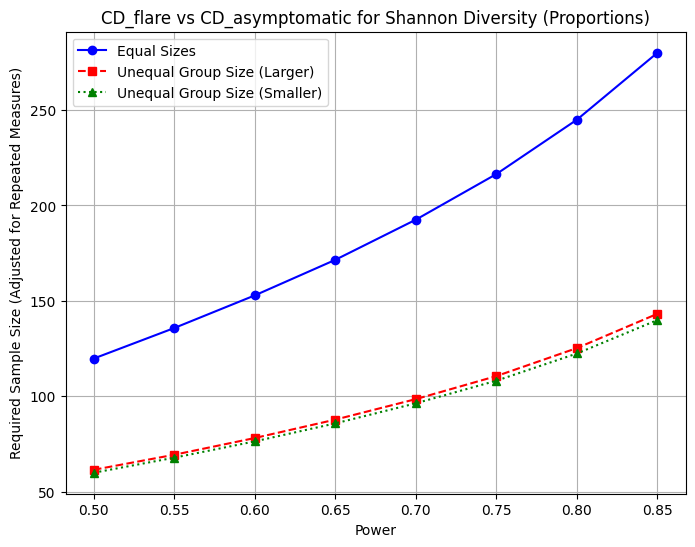

Power: 0.50, Sample Size (Equal, Adjusted): 119.8309252383544, Sample Sizes (Unequal, Adjusted): n1: 61.55848261787493, n2: 60.024997285757046
Power: 0.55, Sample Size (Equal, Adjusted): 135.8229865590123, Sample Sizes (Unequal, Adjusted): n1: 69.44497861162402, n2: 67.91149327950615
Power: 0.60, Sample Size (Equal, Adjusted): 152.91039454546868, Sample Sizes (Unequal, Adjusted): n1: 78.20775193801192, n2: 76.45519727273434
Power: 0.65, Sample Size (Equal, Adjusted): 171.53128786404295, Sample Sizes (Unequal, Adjusted): n1: 87.84680259703859, n2: 85.87517859860132
Power: 0.70, Sample Size (Equal, Adjusted): 192.56194384737387, Sample Sizes (Unequal, Adjusted): n1: 98.58119992186376, n2: 96.3905065902668
Power: 0.75, Sample Size (Equal, Adjusted): 216.44050116178087, Sample Sizes (Unequal, Adjusted): n1: 110.6300132456471, n2: 108.22025058089044
Power: 0.80, Sample Size (Equal, Adjusted): 244.91951447254152, Sample Sizes (Unequal, Adjusted): n1: 125.30765856734682, n2: 122.4597572362707

In [10]:
#Type2: Comparison of the difference in proportions between two groups (Microbiome Specific)
# Sample Calculation for Both groups

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm
import statsmodels.api as sm
from statsmodels.regression.mixed_linear_model import MixedLM

# Load the microbiome diversity data from CSV
data = pd.read_csv('data/df_cd_pilot_highICC.csv') # Equal number of samples in Both Groups

# Select the column for diversity (either 'Observed' or 'Shannon')
column_name = 'Shannon'  # Change to 'Observed' if needed
diversity_data = data[column_name]

# Split data into cases and controls
case_data = diversity_data[data['Group'] == 'CD_flare']
control_data = diversity_data[data['Group'] == 'CD_asymptomatic']

# Split the time column for repeated measures
time = data['Time']

# Calculate means in both groups
P_case = np.mean(case_data)
P_control = np.mean(control_data)

print(f"\nMean in Cases: {P_case:.2f}")
print(f"Mean in Controls: {P_control:.2f}")

# Ask user for the Shannon diversity cutoff
shannon_cutoff = float(input("Enter the Shannon diversity cutoff: "))

# Calculate proportions based on cutoff
P1 = np.mean(case_data > shannon_cutoff)  # Proportion of cases above cutoff
P2 = np.mean(control_data > shannon_cutoff)  # Proportion of controls above cutoff

# Print the proportions
print(f"Proportion P1 (Cases with high diversity): {P1}")
print(f"Proportion P2 (Controls with high diversity): {P2}")

############################################## Functions ############################
# Function to calculate ICC (Intraclass Correlation Coefficient)
def calculate_icc(data, column_name, subject_column):
    model = MixedLM.from_formula(f"{column_name} ~ 1", groups=subject_column, data=data)
    fit = model.fit()
    random_effect_variance = fit.cov_re.iloc[0, 0]  # Variance of random effects
    residual_variance = fit.scale  # Variance of residuals
    total_variance = random_effect_variance + residual_variance
    icc_value = random_effect_variance / total_variance
    return icc_value

# Adjust for ICC in sample size calculation
def adjust_for_repeated_measures(sample_size, icc, num_timepoints):
    # Formula to adjust for ICC and repeated measures
    return sample_size / (1 + (num_timepoints - 1) * icc)

# Function to calculate sample size for equal proportions
def sample_size_equal_proportions(P1, P2, alpha=0.05, power=0.8):
    Z_alpha = norm.ppf(1 - alpha / 2)
    Z_beta = norm.ppf(power)
    numerator = 2 * (Z_alpha + Z_beta) ** 2 * (P1 * (1 - P1) + P2 * (1 - P2))
    denominator = (P1 - P2) ** 2
    return int(np.ceil(numerator / denominator)) if denominator > 0 else np.nan

# Function to calculate sample size for unequal group sizes
def sample_size_unequal_proportions(P1, P2, ratio, alpha=0.05, power=0.8):
    Z_alpha = norm.ppf(1 - alpha / 2)  # Two-sided test
    Z_beta = norm.ppf(power)
    numerator = (Z_alpha + Z_beta) ** 2 * (P1 * (1 - P1) + P2 * (1 - P2))
    denominator = (P1 - P2) ** 2
    
    if denominator == 0 or np.isnan(denominator):
        return np.nan  # Avoid division by zero
    
    n2 = int(np.ceil(numerator / denominator))  # Sample size of smaller group
    n1 = int(np.ceil(ratio * n2))  # Sample size of larger group
    return n1, n2

#################################### Main Analysis ##############################
# Check if proportions are valid
if P1 == P2:
    print("Proportions are equal, unable to calculate sample sizes.")
else:
    # Calculate ICC based on the data
    icc = calculate_icc(data, column_name, subject_column='Subject_ID')
    print(f"Calculated ICC: {icc:.2f}")

    # Define power levels and significance level
    power_levels = np.arange(0.5, 0.9, 0.05)  # Power levels from 0.5 to 0.9
    alpha = 0.05

    # Calculate ratio for unequal groups
    ratio = len(case_data) / len(control_data) if len(control_data) > 0 else 1
    print(f"Calculated ratio: {ratio:.2f}")
    
    # Calculate sample sizes for different power levels
    sample_sizes_equal = []
    sample_sizes_unequal = []

    for power in power_levels:
        # Calculate sample size for equal proportions
        sample_size_eq = sample_size_equal_proportions(P1, P2, alpha, power)
        sample_sizes_equal.append(adjust_for_repeated_measures(sample_size_eq, icc, len(np.unique(time))))
        
        # Calculate sample size for unequal proportions
        n1, n2 = sample_size_unequal_proportions(P1, P2, ratio, alpha, power)
        sample_sizes_unequal.append((adjust_for_repeated_measures(n1, icc, len(np.unique(time))),
                                       adjust_for_repeated_measures(n2, icc, len(np.unique(time)))))

    # Plotting power vs. sample size
    plt.figure(figsize=(8, 6))
    plt.plot(power_levels, sample_sizes_equal, marker='o', linestyle='-', color='b', label='Equal Sizes')
    plt.plot(power_levels, [n[0] for n in sample_sizes_unequal], marker='s', linestyle='--', color='r', label='Unequal Group Size (Larger)')
    plt.plot(power_levels, [n[1] for n in sample_sizes_unequal], marker='^', linestyle=':', color='g', label='Unequal Group Size (Smaller)')
    plt.title(f'CD_flare vs CD_asymptomatic for {column_name} Diversity (Proportions)')
    plt.xlabel('Power')
    plt.ylabel('Required Sample Size (Adjusted for Repeated Measures)')
    plt.grid(True)
    plt.legend()

    # Save the figure
    plt.savefig('Figures/Type2_sampleSize_estimation_withICC.png', dpi=300, bbox_inches='tight')  # Change the file name and format as needed

    plt.show()

    # Print the results
    for power, sample_size_eq, (n1, n2) in zip(power_levels, sample_sizes_equal, sample_sizes_unequal):
        print(f"Power: {power:.2f}, Sample Size (Equal, Adjusted): {sample_size_eq}, Sample Sizes (Unequal, Adjusted): n1: {n1}, n2: {n2}")